<a href="https://colab.research.google.com/github/DrumilHV/Futures-and-Options-Price-Analysis/blob/main/SIH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install keras
! pip install huggingface_hub


In [3]:
import numpy as np # array manipulation
from huggingface_hub import from_pretrained_keras # download the model
import keras # deep learning
from PIL import Image # Image processing

In [4]:
model = from_pretrained_keras("keras-io/lowlight-enhance-mirnet", compile=False)
low_light_img = Image.open('img1.png').convert('RGB')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

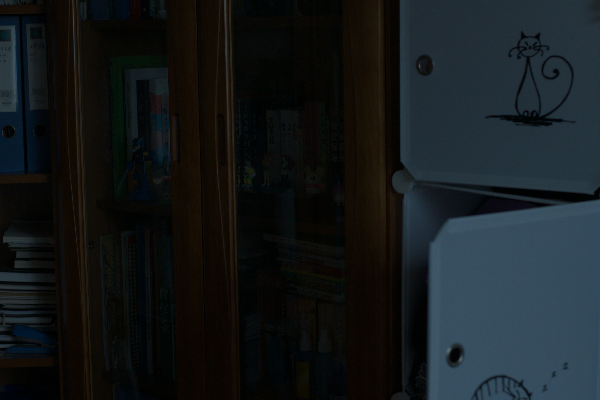

In [5]:
low_light_img


In [6]:
low_light_img = low_light_img.resize((256,256),Image.NEAREST)


In [7]:
#image processing pipeline for mirnet
def process(img):
  low_light_img = Image.open(img).convert('RGB')
  low_light_img
  low_light_img = low_light_img.resize((256,256),Image.NEAREST)
  image = keras.preprocessing.image.img_to_array(low_light_img)
  image.shape
  image = image.astype('float32') / 255.0
  image = np.expand_dims(image, axis = 0)
  image.shape
  output = model.predict(image) # model inference to enhance the low light pics
  output_image = output[0] * 255.0
  output_image = output_image.clip(0,255)
  output_image.shape
  output_image = output_image.reshape((np.shape(output_image)[0],np.shape(output_image)[1],3))
  output_image
  output_image = np.uint32(output_image)
  Image.fromarray(output_image.astype('uint8'),'RGB').save("output")


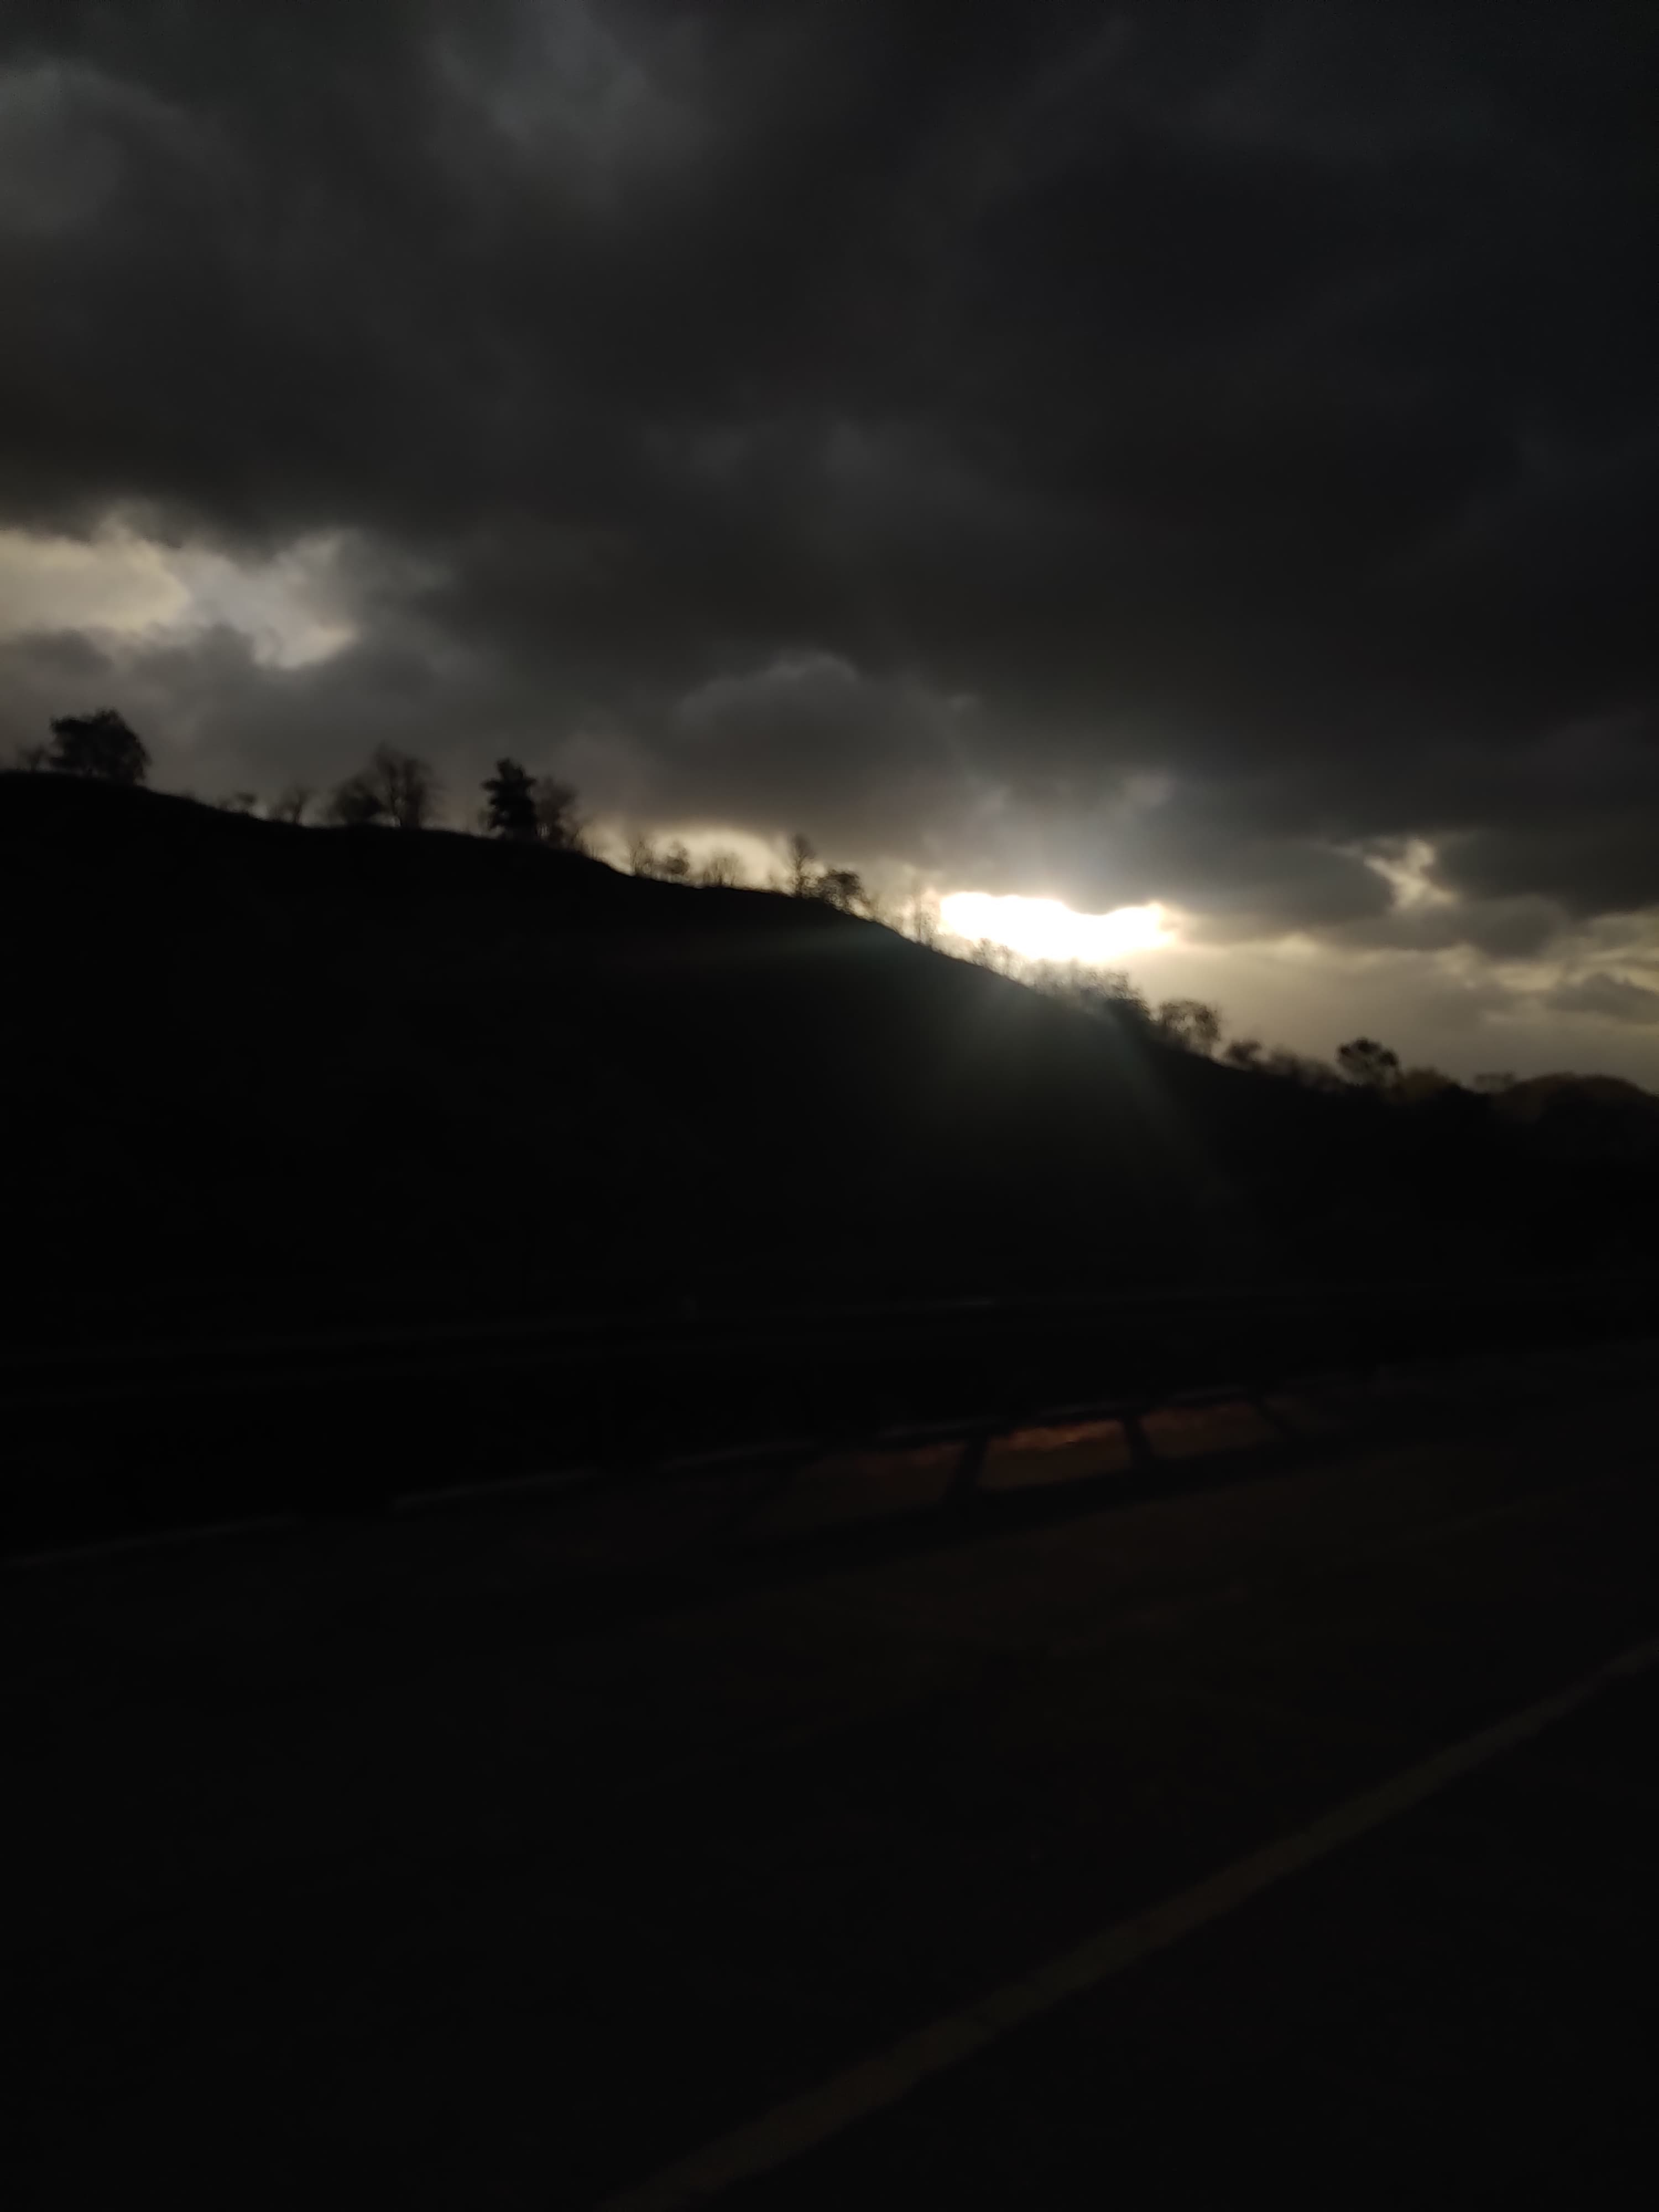

In [13]:
# process("img4.jpg")
low_light_img = Image.open("img6.jpeg").convert('RGB')
low_light_img

1/1 [==============================] - 16s 16s/step


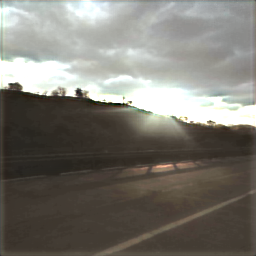

In [14]:
#image processing pipeline for mirnet

# low_light_img = Image.open("img5.jpeg").convert('RGB')
# low_light_img
low_light_img = low_light_img.resize((256,256),Image.NEAREST)
image = keras.preprocessing.image.img_to_array(low_light_img)
image.shape
image = image.astype('float32') / 255.0
image = np.expand_dims(image, axis = 0)
image.shape
output = model.predict(image) # model inference to enhance the low light pics
output_image = output[0] * 255.0
output_image = output_image.clip(0,255)
output_image.shape
output_image = output_image.reshape((np.shape(output_image)[0],np.shape(output_image)[1],3))
output_image
output_image = np.uint32(output_image)
Image.fromarray(output_image.astype('uint8'),'RGB')
